# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 4: Badanie relacji między punktami (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [3]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def point_count_on_subregions(points, bins, x_lim, y_lim):
    H, xedges, yedges = np.histogram2d( points["X"], points["Y"], range = [ x_lim, y_lim ], bins = bins )
    
    return [ H.T, xedges, yedges ]

### Wczytanie danych
Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_HP` - jednorodny rozkład Poissona,
 - `points_R` - rozkład regularny z komponentem losowym,
 - `points_M` - rozkład Materna,

wygenerowane dla zakresu współrzędnych X $[10, 20]$ i Y $[-20, -10]$.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
points_HP = pd.read_pickle('points_HP.pkl')
points_R = pd.read_pickle('points_R.pkl')
points_M = pd.read_pickle('points_M.pkl')

### Zadanie 1: Wykres Morishity (12 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `morishita_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Morishity. 

Algorytm postępowania:
- Kolejno dzielimy obszar na rosnącą liczbę kwadratowych podobszarów.
- Dla każdego z podziałów obliczamy wartość indeksu: <br/>
$MI = L \sum_{i=1}^L \frac{n_i (n_i-1)}{N(N-1)}$ <br/>
gdzie: $L$ - liczba podobszarów, $N$ - liczba punktów, $n_i$ - liczba punktów w obrębie i-tego podobszaru.
- Zestawiamy w tabeli długości boków podobszarów w poszczególnych podziałach z obliczonymi dla nich wartościami indeksu $MI$.

Uwagi do wykonania zadania:
- W części zadania dotyczącej podziału obszaru analizy na podobszary i zliczenia znajdujących się w nich punktów nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `point_count_on_subregions()`, którą można wkleić we wskazanej komórce na początku notatnika.

In [5]:
def morishita_plot_data(points, bins_list, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins_list: list
        Lista zawierająca wszystkie zestawy parametrów określających liczbę podobszarów w poziomie i pionie, dla których mają zostać przeprowadzone obliczenia.
        Przykład: [[2, 2], [4, 4], [8, 8], [16, 16]]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    morishita_index: DataFrame
        Tablica zawierająca dwie kolumny:
        - "BD" - długości boków podobszarów uszeregowane od największej do najmniejszej wartości,
        - "MI" - wartości indeksów MI wyliczone dla poszczególnych podziałów.
    """
    # YOUR CODE HERE
    # create empty list to store length of subregions and MI index values
    BD = []
    MI = []

    # calculate original length
    length = x_lim[1] - x_lim[0]
    
    # iterate through counts of subregions
    for i in range(len(bins_list)):
        # count how many points in each subregion
        count =  point_count_on_subregions(points, bins_list[i], x_lim, y_lim)[0] 
        # calculate total number of points
        N = np.sum(count)
        
        # append length of subregion
        BD.append(length / bins_list[i][0])
        # calculate number of subregions
        L = bins_list[i][0]**2
        # calculate and append MI value
        MI.append( L * np.sum ( ( count * (count - 1 ) ) / ( N *( N - 1 ) ) ) )
        
    return pd.DataFrame( { "BD" : BD, "MI" : MI} )

In [6]:
# Komórka testowa
test_results_1 = morishita_plot_data(points_HP, bins_list=[[2, 2], [5, 5], [13, 13], [20, 20]], x_lim=[10, 15], y_lim=[-20, -15])
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (4, 2)
assert list(test_results_1.columns) == ["BD", "MI"]
assert np.all(np.isclose(test_results_1["BD"].values, np.array([2.5       , 1.        , 0.38461538, 0.25      ])))
assert np.all(np.isclose(test_results_1["MI"].values, np.array([0.98189135, 0.86519115, 0.68008048, 1.44869215])))

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich wczytanych do notatnika rozkładów punktowych. Wykonaj obliczenia dla całego obszaru, na którym zostały wygenerowane punkty podzielonego na 2x2, 3x3, ..., 40x40 podobszarów w poziomie i w pionie.

Przedstaw wyniki analizy graficznie w postaci wykresów punktowych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym, a wykresy Morishity w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów Morishity.

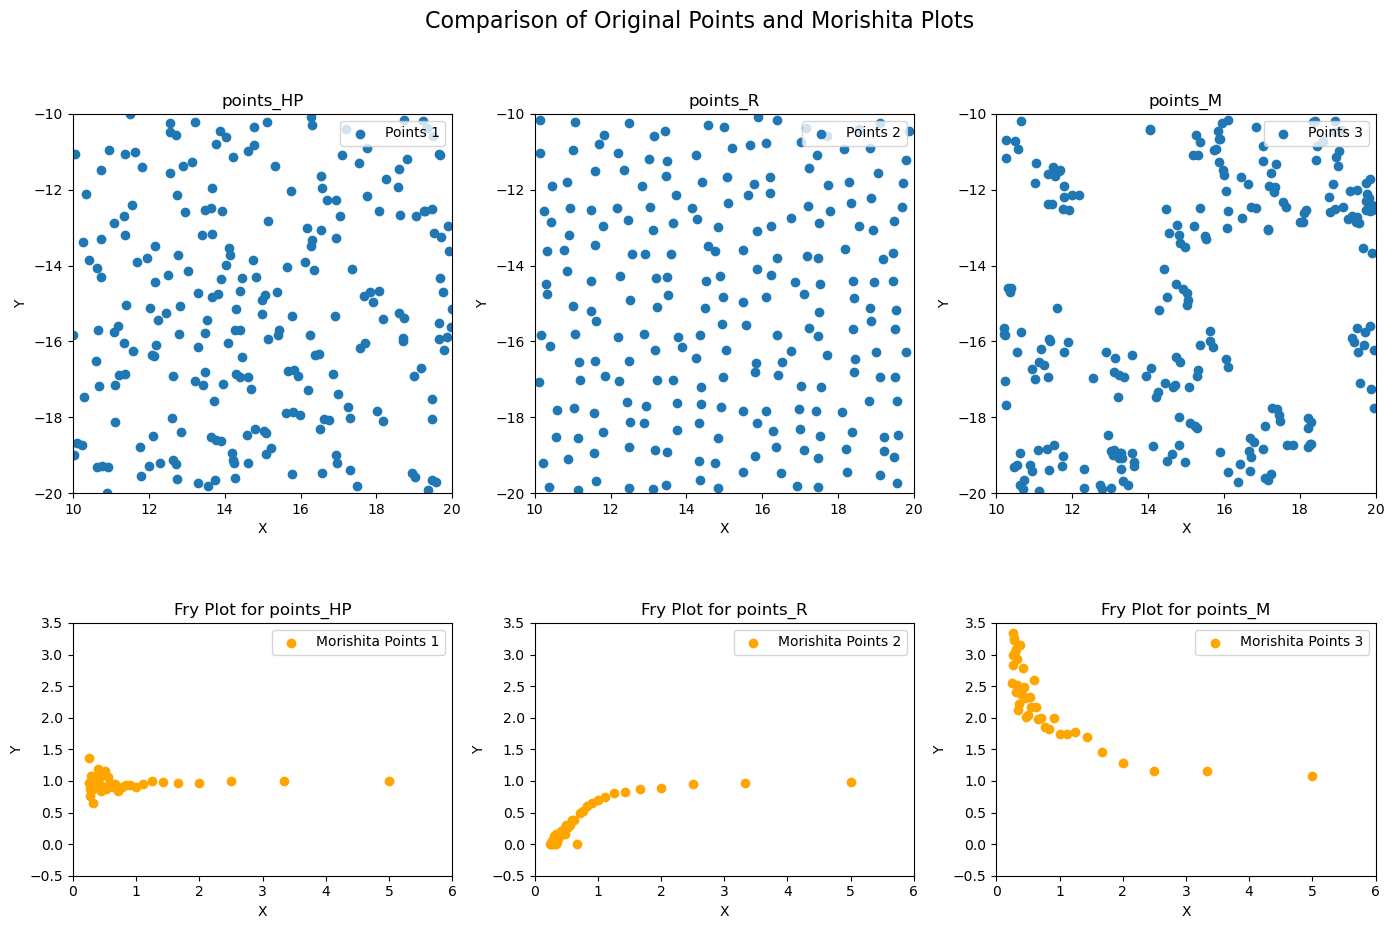

In [7]:
# YOUR CODE HERE
inputs = [points_HP, points_R, points_M]
inputs_title = ["points_HP", "points_R", "points_M"]
subregions = [[x, x] for x in range(2, 41)]
morishita_points = [morishita_plot_data(input, subregions, [10, 20], [-20, -10]) for input in inputs]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), facecolor='white')  # Set a white background

# Plot original points
for i, (input_data, ax) in enumerate(zip(inputs, axes[0])):
    ax.scatter(input_data['X'], input_data['Y'], label=f'Points {i+1}')
    ax.set_title(inputs_title[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(10, 20)
    ax.set_ylim(-20, -10)
    ax.legend(loc='upper right')
    ax.set_aspect('equal')

# Plot Morishita points
for i, (morishita_data, ax) in enumerate(zip(morishita_points, axes[1])):
    ax.scatter(morishita_data['BD'], morishita_data['MI'], label=f'Morishita Points {i+1}', color="orange")
    ax.set_title(f'Fry Plot for {inputs_title[i]}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Set common axis limits for Morishita points plots
for ax in axes[1]:
    ax.set_xlim(0, 6)
    ax.set_ylim(-0.5, 3.5)
    ax.set_aspect('equal')  # Maintain equal aspect ratio based on data limits

# Set a title for the entire figure
fig.suptitle('Comparison of Original Points and Morishita Plots', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to accommodate the suptitle
plt.show()

### Zadanie 2: Wykres Fry (12 pkt)

#### a) Przygotowanie funkcji
Przygotuj funkcję `fry_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Fry.

Algorytm postępowania: <br/>
- Traktując kolejno każdy punkt analizowanego rozkładu jako początek układu współrzędnych zapisujemy współrzędne pozostałych punktów względem niego.
Rezultatem jest zbiór współrzędnych $n(n-1)$ punktów, gdzie $n$ to liczba punktów w analizowanym rozkładzie.

In [8]:
def fry_plot_data(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    fry_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """    
    # YOUR CODE HERE
    # create empty dataframe to store results
    fry_points = pd.DataFrame()

    # iterate through each row of input file
    for index, row in points.iterrows():
        # modify coordinates of whole df
        new_points = points - row
        # concat points with new coordinates to result dataframe except for (0, 0) point
        fry_points = pd.concat([fry_points, new_points.drop(index=index)])

    fry_points = fry_points.reset_index(drop=True)

    return fry_points


In [9]:
# Komórka testowa
test_results_2 = fry_plot_data(points_R)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (50400, 2)
assert list(test_results_2.columns) == ["X", "Y"]
assert np.isclose(test_results_2["X"].min(), -9.780351083790674)
assert np.isclose(test_results_2["X"].max(), 9.780351083790674)
assert np.isclose(test_results_2["Y"].min(), -9.820917153357763)
assert np.isclose(test_results_2["Y"].max(), 9.820917153357763)
assert np.isclose(np.min(np.sqrt(test_results_2["X"]**2 + test_results_2["Y"]**2)), 0.2422502497911993)
assert np.isclose(np.max(np.sqrt(test_results_2["X"]**2 + test_results_2["Y"]**2)), 13.427014041427164)
assert np.isclose(np.mean(np.sqrt(test_results_2["X"]**2 + test_results_2["Y"]**2)), 5.2279202259517525)

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich wczytanych do notatnika rozkładów punktowych.

Przedstaw wyniki analizy graficznie w postaci wykresów punktowych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym, a wykresy Fry w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów Fry oraz dobierz rozmiar i przeźroczystość punktów tak, aby wykresy dobrze oddawały charakter rozkładu, którego dotyczą.

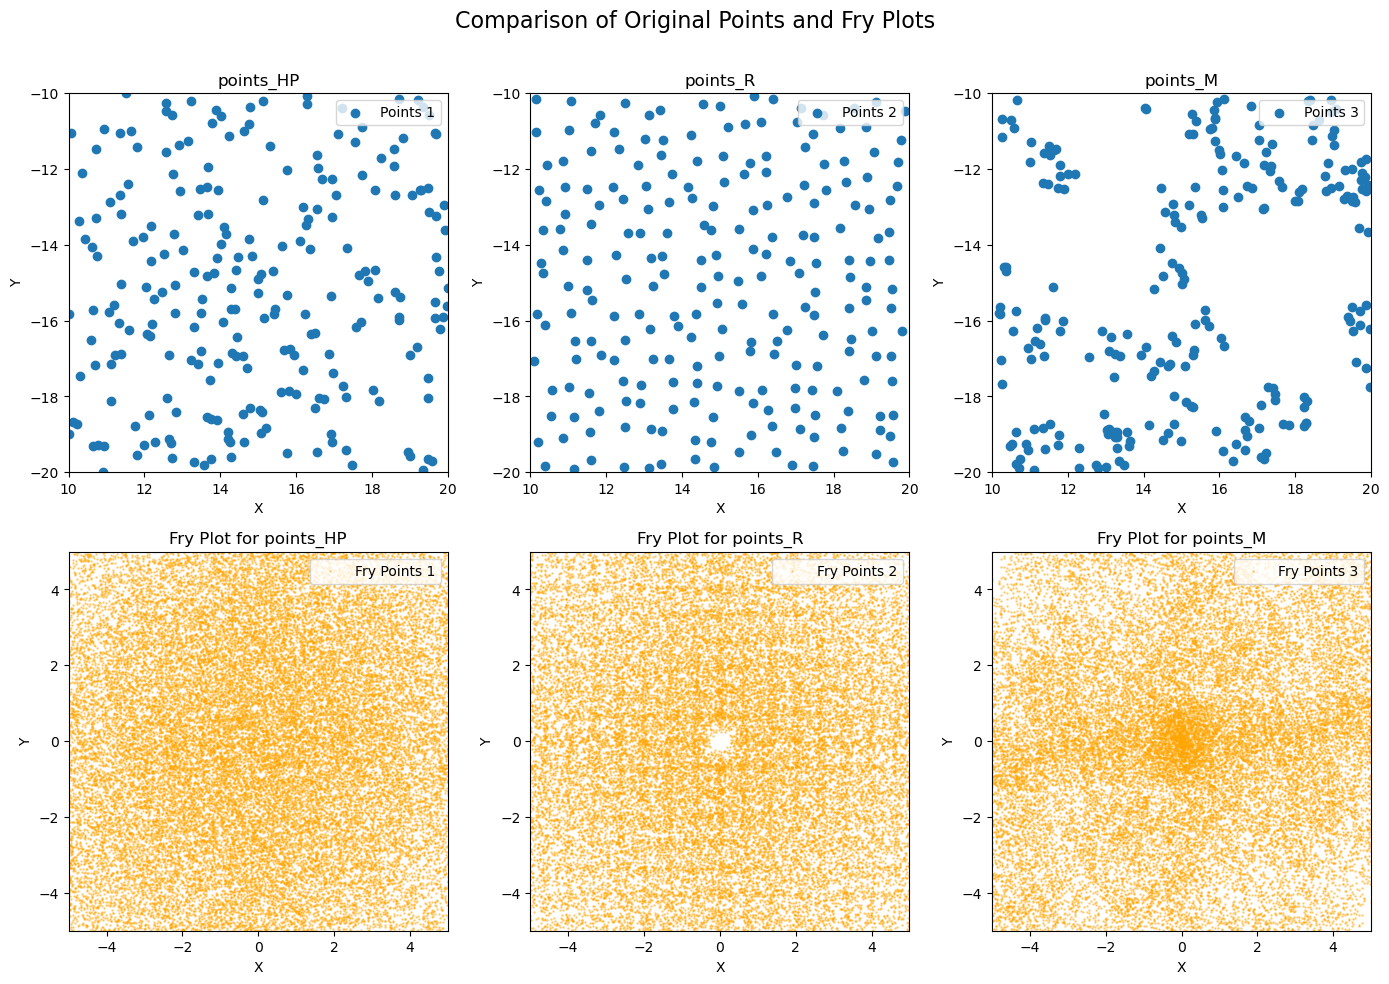

In [10]:
# YOUR CODE HERE
inputs = [points_HP, points_R, points_M]
inputs_title = ["points_HP", "points_R", "points_M"]
fry_points = [fry_plot_data(input) for input in inputs]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), facecolor='white')  # Set a white background

# Plot original points
for i, (input_data, ax) in enumerate(zip(inputs, axes[0])):
    ax.scatter(input_data['X'], input_data['Y'], label=f'Points {i+1}')
    ax.set_title(inputs_title[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(10, 20)
    ax.set_ylim(-20, -10)
    ax.legend(loc='upper right')
    ax.set_aspect('equal')

# Plot Fry points
for i, (fry_data, ax) in enumerate(zip(fry_points, axes[1])):
    ax.scatter(fry_data['X'], fry_data['Y'], label=f'Fry Points {i+1}', s=0.8, alpha=0.4, color="orange")
    ax.set_title(f'Fry Plot for {inputs_title[i]}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Set common axis limits for Fry points plots
for ax in axes[1]:
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')  # Maintain equal aspect ratio based on data limits

# Set a title for the entire figure
fig.suptitle('Comparison of Original Points and Fry Plots', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to accommodate the suptitle
plt.show()